# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [25]:
X, y, c = make_blobs(n_samples=500,
                     cluster_std=0.8,
                     centers=4,
                     n_features=2,
                     return_centers=True
                     )

In [26]:
df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1],
        'y':y
    }
)
df_blobs

,x1,x2,y
0,4.023886,-2.790259,3
1,6.831579,-8.136173,2
2,6.761383,-8.744893,2
3,7.438171,-7.415135,2
4,8.305627,1.575243,0
...,...,...,...
495,3.573512,-4.808436,3
496,-7.196972,9.035339,1
497,9.063836,-6.974472,2
498,6.174485,2.036957,0


In [27]:
df_centers = pd.DataFrame(
    {
        'cx':c[:,0],
        'cy':c[:,1]
    }
)
df_centers

,cx,cy
0,7.622719,1.369886
1,-7.311667,7.242123
2,7.768415,-7.916127
3,3.319856,-3.665741


## Visualización de datos

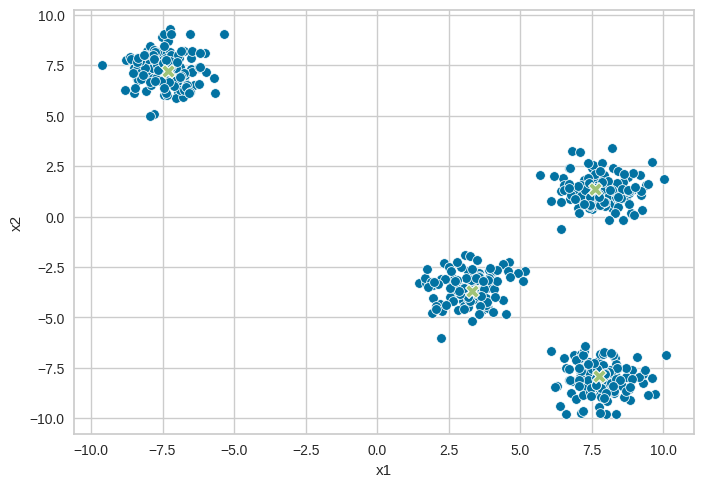

In [28]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2')
sns.scatterplot(data = df_centers, x= 'cx',y='cy',marker='X',s=100)
plt.show()

## Aplicando K-means

In [29]:
kmeans = KMeans(n_clusters=4)
df_cluster= kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
df_blobs


/home/nico9779/anaconda3/envs/clustering/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,x1,x2,y,cluster
0,4.023886,-2.790259,3,3
1,6.831579,-8.136173,2,0
2,6.761383,-8.744893,2,0
3,7.438171,-7.415135,2,0
4,8.305627,1.575243,0,2
...,...,...,...,...
495,3.573512,-4.808436,3,3
496,-7.196972,9.035339,1,1
497,9.063836,-6.974472,2,0
498,6.174485,2.036957,0,2


In [30]:
kmeans_centers = kmeans.cluster_centers_
df_kmeans_centers = pd.DataFrame(
    {
        'cx':kmeans_centers[:,0],
        'cy':kmeans_centers[:,1]
    }
)
df_kmeans_centers

,cx,cy
0,7.820970,-8.018520
1,-7.392605,7.306665
2,7.813213,1.318269
3,3.257234,-3.529420


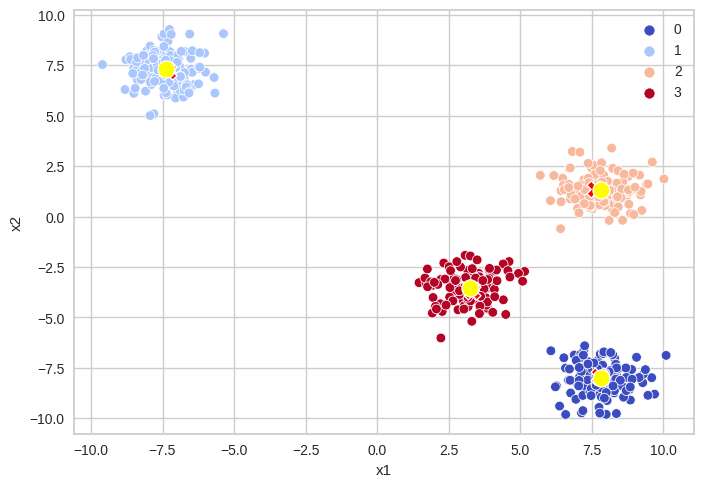

In [31]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2',hue='cluster',palette='coolwarm')
sns.scatterplot(data = df_centers, x= 'cx',y='cy',marker='X',s=150,color='red')
sns.scatterplot(data =df_kmeans_centers, x= 'cx',y='cy',marker='o',s=150,color='yellow')
plt.show()

In [32]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    df_cluster= kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    kmeans_centers = kmeans.cluster_centers_
    df_kmeans_centers = pd.DataFrame(
        {
            'cx':kmeans_centers[:,0],
            'cy':kmeans_centers[:,1]
        }
    )
    sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2',hue='cluster',palette='coolwarm')
    sns.scatterplot(data = df_centers, x= 'cx',y='cy',marker='X',s=150,color='red')
    sns.scatterplot(data =df_kmeans_centers, x= 'cx',y='cy',marker='o',s=150,color='yellow')
    plt.show()
            

2


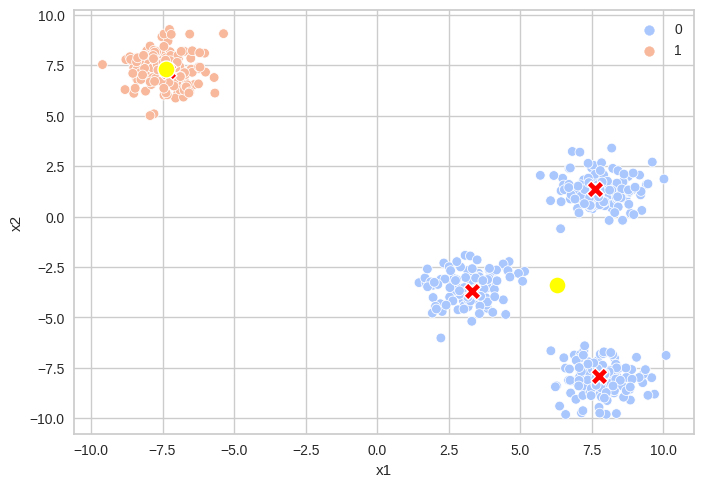

3


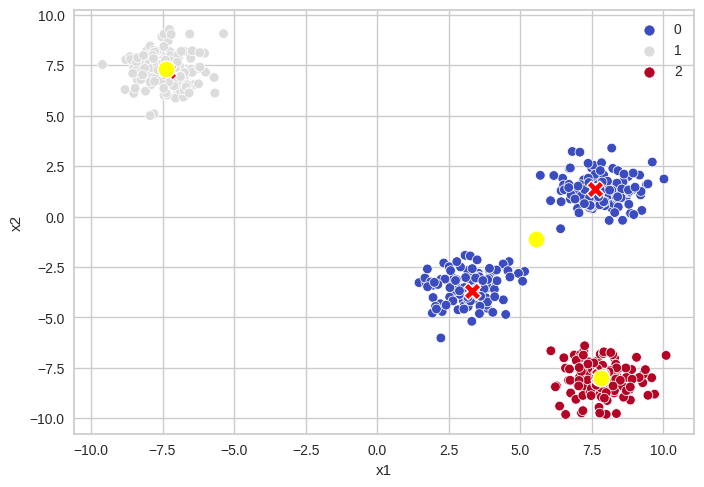

4


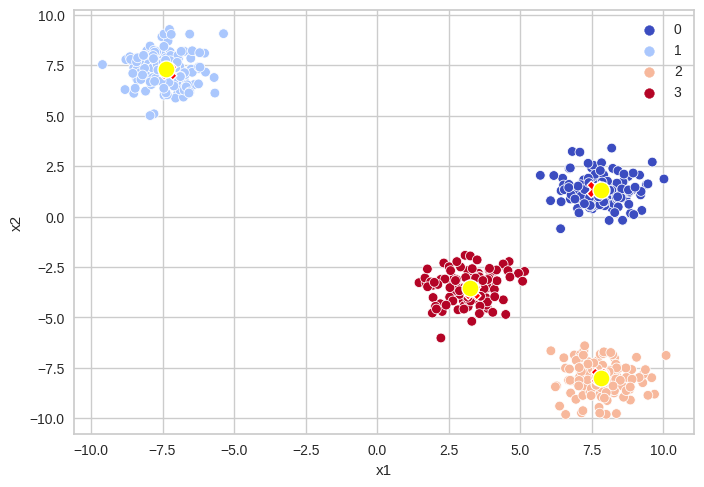

5


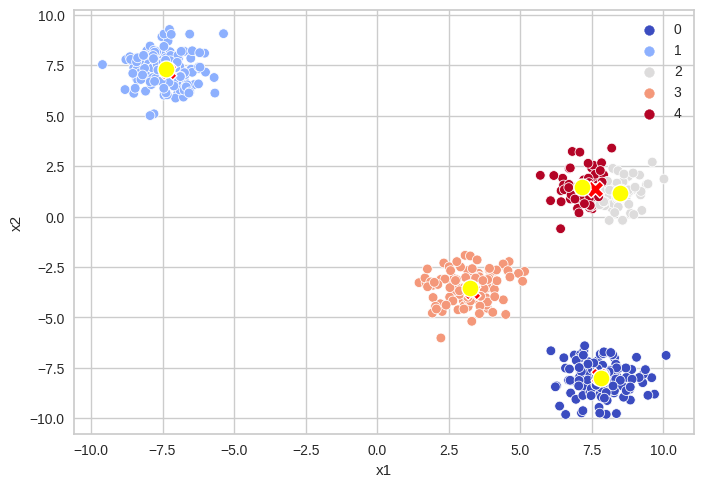

6


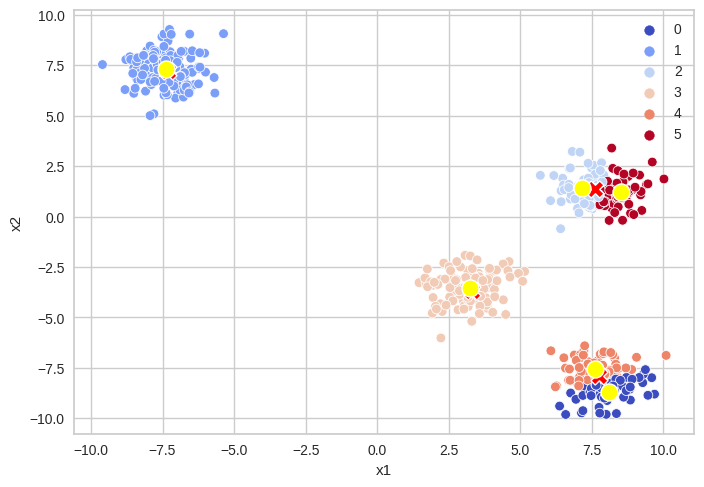

In [33]:
for _ in range(2,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

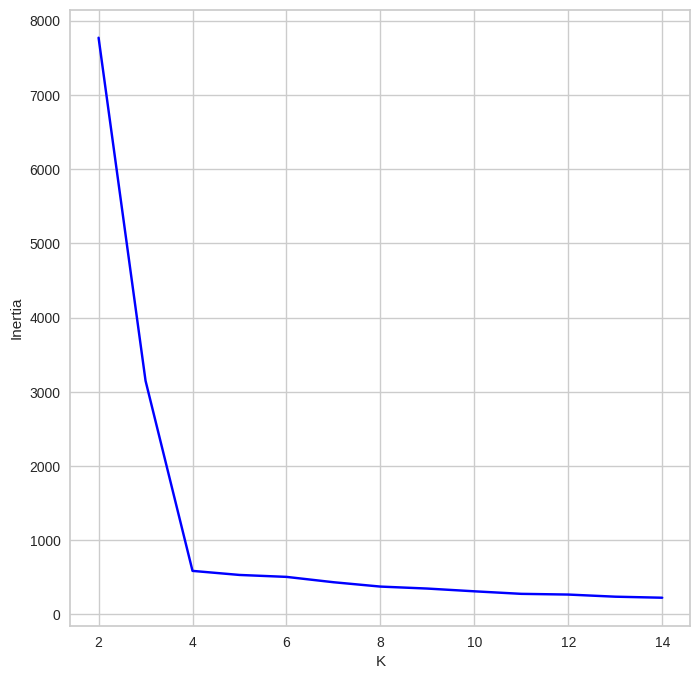

In [34]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,n_init='auto')
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, color='blue',marker='x',linestyle='-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


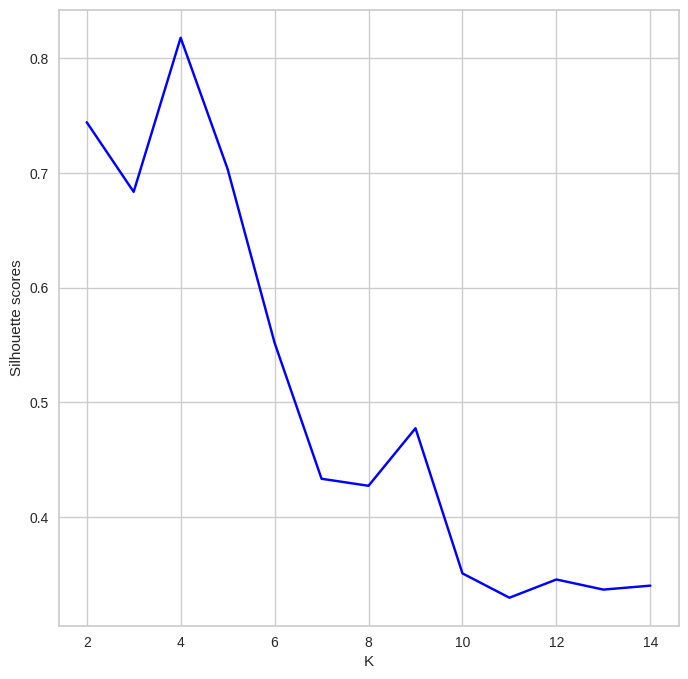

In [35]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,n_init='auto')
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, color='blue',marker='x',linestyle='-')
plt.xlabel('K')
plt.ylabel('Silhouette scores')
plt.show()


## Evaluando clusters con K-means

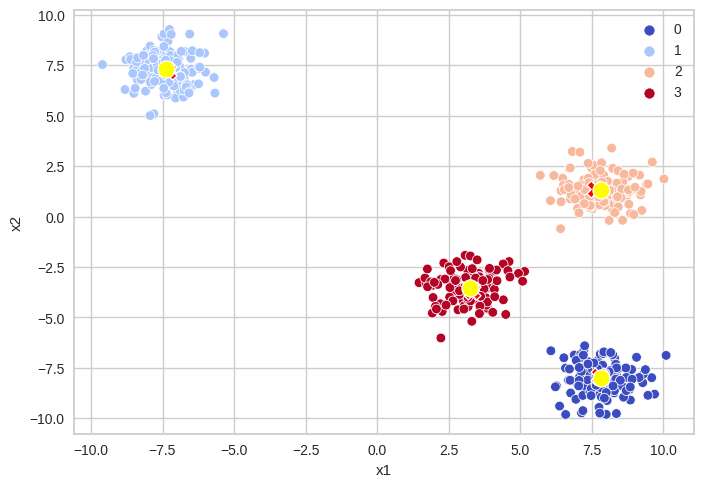

In [36]:
vis_cluster(4)

0.8177457374104115


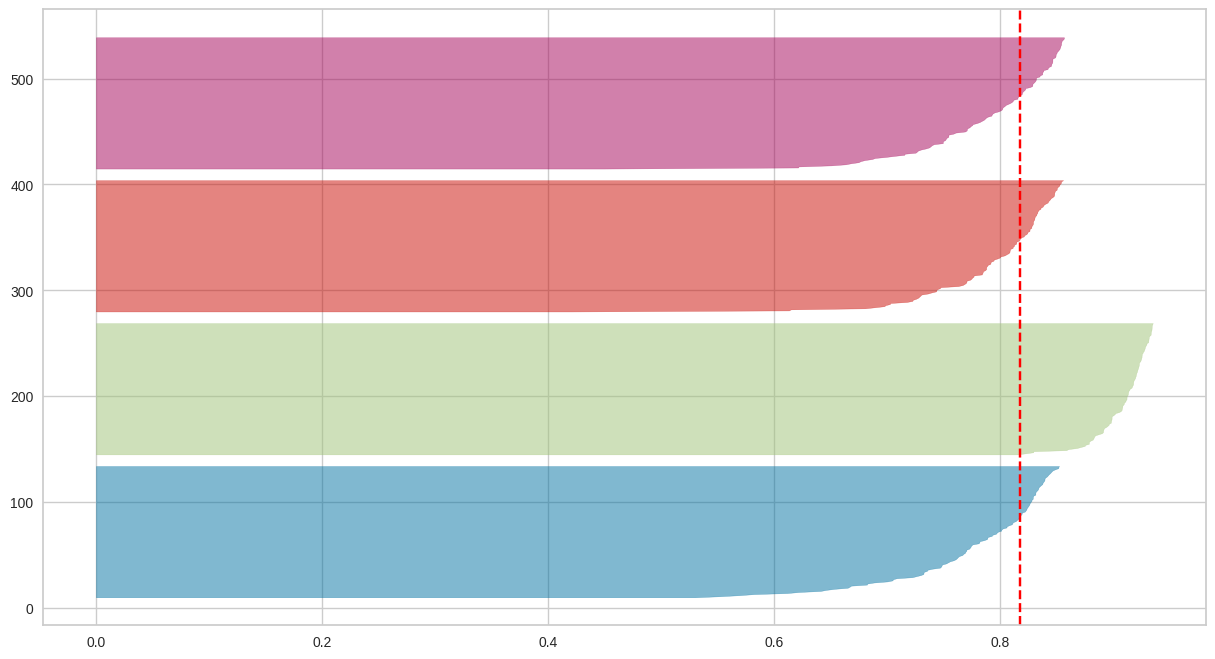

In [37]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(km,colors = 'yellowbrick')
visualizer.fit(X)
yc_predict = km.predict(X)
print(silhouette_score(X,yc_predict))